## PART 2, Samuel Nicklaus

In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import fetch_openml
import pickle
from scipy.special import expit,softmax
from sklearn.model_selection import train_test_split
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## Open MNIST data and create a subset with desired digits
MNIST dataset contains 70,000 images of hand-written digits from 0 to 9. Each image has a grey-scale resolution of 28 $\times$ 28 (i.e., 784 pixels). Each pixel has an integer value ranging from 0 (bright) to 255 (dark).

<font color=red>Change the code below to select a different subset </font>

In [75]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = np.asarray([int(numeric_string) for numeric_string in y])

# Change the conditions below to compare between other N digits
nClasses = 3
nIndices = y < nClasses
x1 = X[nIndices]
x2 = y[nIndices]

with open('temp.pickle', 'wb') as handle:
    pickle.dump([x1, x2], handle)

c:\Users\Samue\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Split the data to training, testing, and validation subsets

In [76]:
# loading the temporary variables for fast retrieval
with open('temp.pickle', 'rb') as handle:
    Xnew, ynew = pickle.load(handle)

X_train, X_test, y_train, y_test = train_test_split(Xnew, ynew, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.125, random_state=1)

Nfeatures = X_train.shape[1]

X_train = X_train.T
X_val = X_val.T
X_test = X_test.T

# Accuracy of a MCC classifier

In [77]:
def testLinearMCClassifier(a, X, y):
    x_T = X.T
    misclassifications = 0
    for i in range(x_T.shape[0]):
        biased_features = np.append(x_T[i],1)
        predict = np.dot(biased_features, a.T)
        if predict.argmax() != y[i]:
            misclassifications += 1
    return misclassifications


## gaussianMultiChannelClassifier

In [78]:

def gaussianMultiChannelClassifier(Xtrain,ytrain,number_of_classes = nClasses):
    if Xtrain.shape[0] != len(ytrain): # Fixes ValueError: operands could not be broadcast together with shapes (784,3) (15239,3)
        Xtrain = Xtrain.T
    num_features = Xtrain.shape[1]
    a = np.zeros((nClasses,num_features+1))
    for i in range(number_of_classes):
        features= Xtrain[ytrain==i, :]
        mu = np.mean(features,axis=0)
        a[i,:-1] = mu
        a[i, -1] = -0.5 * np.dot(mu, mu)               
    return a        

## logisticRegressionMultiClassClassifier

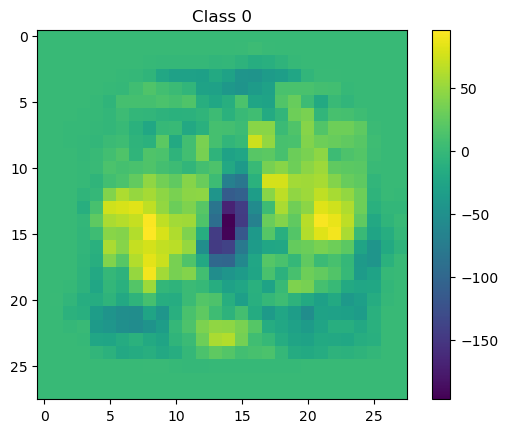

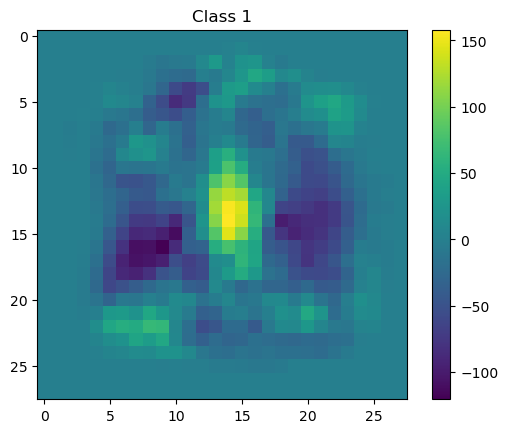

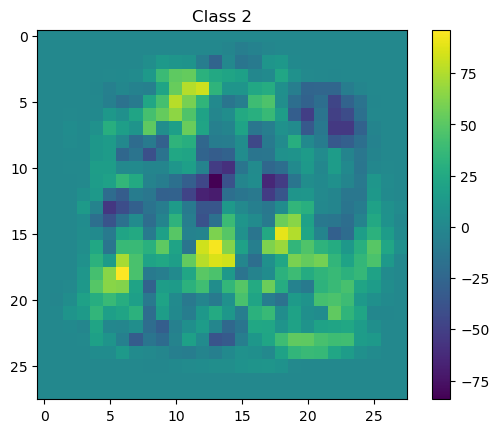

In [85]:
def logisticRegressionMultiClassClassifier(Xtrain,ytrain,iterations=100,step_size=1e-4,verbose=False):
    if Xtrain.shape[0] != len(ytrain): # Fixes ValueError: operands could not be broadcast together with shapes (784,3) (15239,3)
        Xtrain = Xtrain.T
    biased_features = np.hstack((Xtrain, np.zeros((Xtrain.shape[0], 1))))
    w = 0.01*np.random.randn(nClasses, biased_features.shape[1])
    for _ in range(iterations):
        scores = np.dot(biased_features, w.T)
        probs = softmax(scores, axis=1)
        labels = np.eye(nClasses)[ytrain]
        error = probs - labels
        gradient = np.dot(biased_features.T, error)
        w -= step_size * gradient.T
    return w

w = logisticRegressionMultiClassClassifier(X_train,y_train,iterations=500,verbose=False)
for i in range(nClasses):
    weights = w[i, :-1]
    plt.figure()
    plt.imshow(weights.reshape(28, 28))
    plt.title('Class ' + str(i))
    plt.colorbar()
    plt.show() 

## logisticRegressionMultiClassClassifier

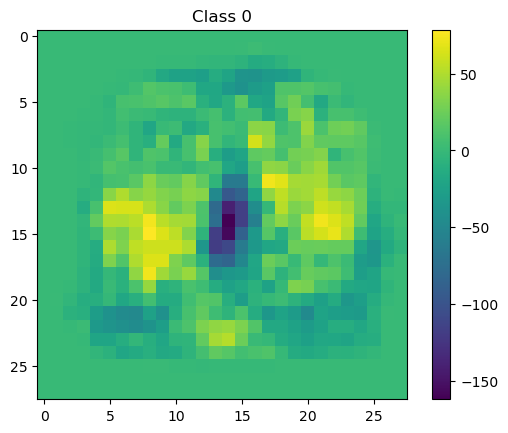

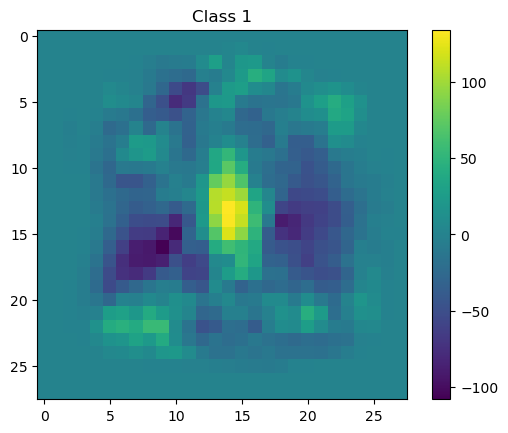

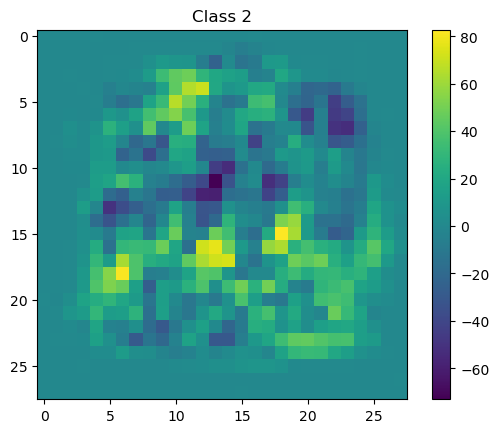

In [ ]:
def logisticRegressionMultiClassClassifierWithRegularization(Xtrain,ytrain,n = nClasses,iterations=100,step_size=1e-4,lam=0,verbose=False):
    if Xtrain.shape[0] != len(ytrain): # Fixes ValueError: operands could not be broadcast together with shapes (784,3) (15239,3)
        Xtrain = Xtrain.T
    biased_features = np.hstack((Xtrain, np.zeros((Xtrain.shape[0], 1))))
    w = 0.01*np.random.randn(n, biased_features.shape[1])
    for _ in range(iterations):
        scores = np.dot(biased_features, w.T)
        probs = softmax(scores, axis=1)
        labels = np.eye(n)[ytrain]
        error = probs - labels
        gradient = np.dot(biased_features.T, error) + lam*w.T
        w -= step_size * gradient.T
    return w


w = logisticRegressionMultiClassClassifierWithRegularization(X_train,y_train,iterations=500,verbose=False,lam=1)
for i in range(nClasses):
    weights = w[i, :-1]
    plt.figure()
    plt.imshow(weights.reshape(28, 28))
    plt.title('Class ' + str(i))
    plt.colorbar()
    plt.show() 

## logisticRegressionMultiClassClassifierWithRegularization

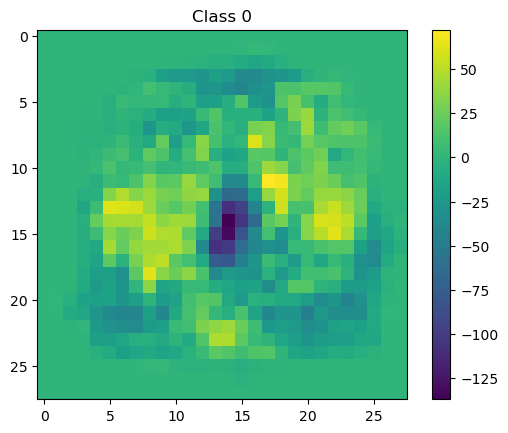

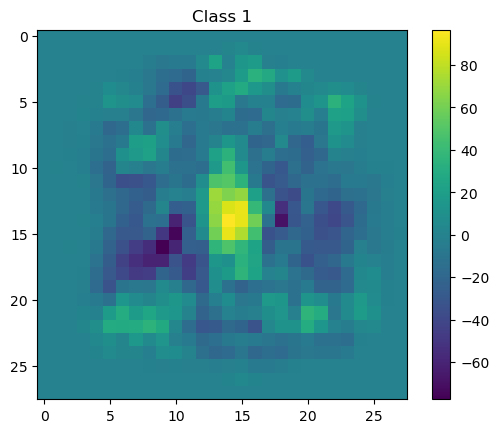

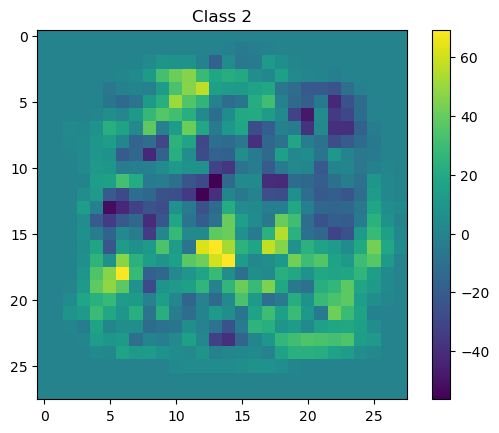

In [ ]:

def logisticRegressionMultiClassClassifierWithRegularization(Xtrain,ytrain, n = nClasses,iterations=100,step_size=1e-4,lam=0,verbose=False):
    if Xtrain.shape[0] != len(ytrain): # Fixes ValueError: operands could not be broadcast together with shapes (784,3) (15239,3) 
        Xtrain = Xtrain.T
    biased_training_features = np.hstack((Xtrain, np.zeros((Xtrain.shape[0], 1))))
    w = 0.01*np.random.randn(n, biased_training_features.shape[1])
    for _ in range(iterations):
        scores = np.dot(biased_training_features, w.T)
        prob = softmax(scores, axis=1)
        labels = np.eye(n)[ytrain]
        error = prob - labels
        gradient = np.dot(biased_training_features.T, error) + lam*w.T
        w -= step_size * gradient.T
    return w


w = logisticRegressionMultiClassClassifierWithRegularization(X_train,y_train,iterations=500,verbose=False,lam=1)
for i in range(nClasses):
    weights = w[i, :-1]
    plt.figure()
    plt.imshow(weights.reshape(28, 28))
    plt.title('Class ' + str(i))
    plt.colorbar()
    plt.show() 

## Optimize_MC_Hyperparameters

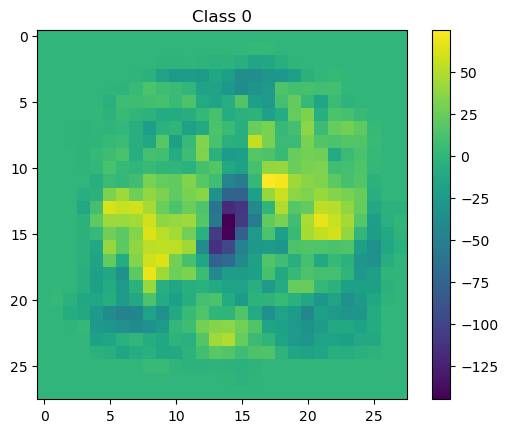

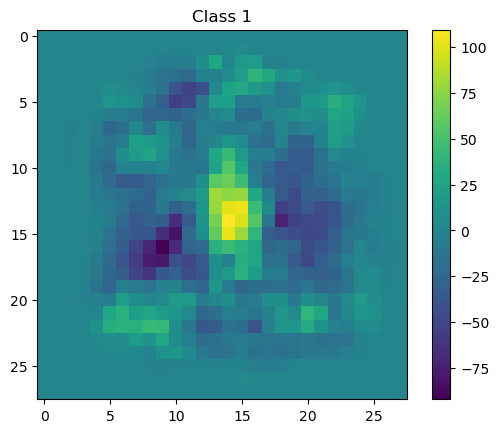

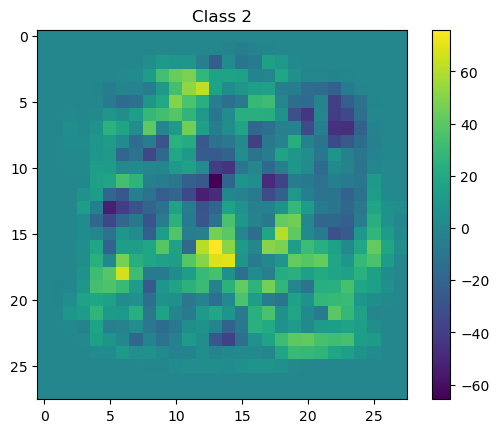

In [99]:
def Optimize_MC_Hyperparameters(Xtrain, ytrain):
    # set default values
    min_lambda_init = 1e-4
    max_lambda_init = 1e4
    iterations = 5
    num_lambda_values = 5
    min_lambda = min_lambda_init
    max_lambda = max_lambda_init
    optimal_lambda = None
    max_score = 9999999999
    max_weights= None
    for _ in range(iterations):
        lam = np.logspace(np.log10(min_lambda), np.log10(max_lambda), num=num_lambda_values)
        for l in lam:
            weights = logisticRegressionMultiClassClassifierWithRegularization(Xtrain, ytrain, iterations=500, step_size=1e-4, lam=l, verbose=False)
            score = testLinearMCClassifier(weights, Xtrain, ytrain)
            if score < max_score:
                max_score = score
                max_weights = weights
                optimal_lambda = l
        min_lambda = optimal_lambda/10
        max_lambda = optimal_lambda*10
    return optimal_lambda, max_weights

_, w = Optimize_MC_Hyperparameters(X_train,y_train)
for i in range(nClasses):
    weights = w[i, :-1]
    plt.figure()
    plt.imshow(weights.reshape(28, 28))
    plt.title('Class ' + str(i))
    plt.colorbar()
    plt.show()


# REPORT TEST ERRORS OF THE BEST MODELS

YOUR CODE BELOW

In [97]:
# Gaussian Multi-Channel Classifier 
print("Gaussian Multi-Channel Classifier Results:")
weights = gaussianMultiChannelClassifier(X_train,y_train)
train = testLinearMCClassifier(weights,X_train,y_train)
val = testLinearMCClassifier(weights,X_val,y_val)
test = testLinearMCClassifier(weights,X_test,y_test)

print(f"Training missclassification : {train} out of {X_train.T.shape[0]}, representing {train/X_train.T.shape[0]*100:.2f}%")
print(f"Training missclassification : {val} out of {X_train.T.shape[0]}, representing {val/X_val.T.shape[0]*100:.2f}%")
print(f"Training missclassification : {test} out of {X_train.T.shape[0]}, representing {test/X_test.T.shape[0]*100:.2f}%")
print("---------------------------------------------------------------------------------------------------------------")

# Logistic Regression Multi-Channel Classifier
print("Logistic Regression Multi-Channel Classifier Results:")
weights = logisticRegressionMultiClassClassifier(X_train,y_train)
train = testLinearMCClassifier(weights,X_train,y_train)
val = testLinearMCClassifier(weights,X_val,y_val)
test = testLinearMCClassifier(weights,X_test,y_test)

print(f"Training missclassification : {train} out of {X_train.T.shape[0]}, representing {train/X_train.T.shape[0]*100:.2f}%")
print(f"Training missclassification : {val} out of {X_train.T.shape[0]}, representing {val/X_val.T.shape[0]*100:.2f}%")
print(f"Training missclassification : {test} out of {X_train.T.shape[0]}, representing {test/X_test.T.shape[0]*100:.2f}%")
print("---------------------------------------------------------------------------------------------------------------")
# Logistic Regression Multi-Channel Classifier with Regularization
print("Logistic Regression Multi-Channel Classifier with Regularization Results:")
weights = logisticRegressionMultiClassClassifierWithRegularization(X_train,y_train,iterations=500,verbose=False)
train = testLinearMCClassifier(weights,X_train,y_train)
val = testLinearMCClassifier(weights,X_val,y_val)
test = testLinearMCClassifier(weights,X_test,y_test)

print(f"Training missclassification : {train} out of {X_train.T.shape[0]}, representing {train/X_train.T.shape[0]*100:.2f}%")
print(f"Training missclassification : {val} out of {X_train.T.shape[0]}, representing {val/X_val.T.shape[0]*100:.2f}%")
print(f"Training missclassification : {test} out of {X_train.T.shape[0]}, representing {test/X_test.T.shape[0]*100:.2f}%")
print("---------------------------------------------------------------------------------------------------------------")

# Optimized Multi-Channel Hyperparameters
print("Optimized Multi-Channel Hyperparameters Results:")
optimal_lambda, weights = Optimize_MC_Hyperparameters(X_train,y_train)
train = testLinearMCClassifier(weights,X_train,y_train)
val = testLinearMCClassifier(weights,X_val,y_val)
test = testLinearMCClassifier(weights,X_test,y_test)

print(f"Training missclassification : {train} out of {X_train.T.shape[0]}, representing {train/X_train.T.shape[0]*100:.2f}%")
print(f"Training missclassification : {val} out of {X_train.T.shape[0]}, representing {val/X_val.T.shape[0]*100:.2f}%")
print(f"Training missclassification : {test} out of {X_train.T.shape[0]}, representing {test/X_test.T.shape[0]*100:.2f}%")
print("---------------------------------------------------------------------------------------------------------------")




Gaussian Multi-Channel Classifier Results:
Training missclassification : 916 out of 15239, representing 6.01%
Training missclassification : 127 out of 15239, representing 5.83%
Training missclassification : 255 out of 15239, representing 5.86%
---------------------------------------------------------------------------------------------------------------
Logistic Regression Multi-Channel Classifier Results:
Training missclassification : 202 out of 15239, representing 1.33%
Training missclassification : 36 out of 15239, representing 1.65%
Training missclassification : 78 out of 15239, representing 1.79%
---------------------------------------------------------------------------------------------------------------
Logistic Regression Multi-Channel Classifier with Regularization Results:
Training missclassification : 123 out of 15239, representing 0.81%
Training missclassification : 40 out of 15239, representing 1.84%
Training missclassification : 55 out of 15239, representing 1.26%
------